In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

data = pd.read_csv('AMZN.csv')

dataset = tf.data.Dataset.from_tensor_slices((data['High'], data['Low'], data['Close']))

In [ ]:
df = pd.read_csv('AMZN.csv')
df['MA20'] = df['Close'].rolling(window=20).mean()

df['stddev'] = df['Close'].rolling(window=20).std()

df['Upper'] = df['MA20'] + (df['stddev'] * 2)

df['Lower'] = df['MA20'] - (df['stddev'] * 2)

data = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA20', 'Upper', 'Lower']]

dataset = tf.data.Dataset.from_tensor_slices((data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA20', 'Upper', 'Lower']], data['Close']))

dataset = dataset.shuffle(buffer_size=10000).batch(32)

df = df.fillna('N/A')

df.head(251)


,Date,Open,High,Low,Close,Adj Close,Volume,MA20,stddev,Upper,Lower
0,2022-05-18,111.439499,112.852997,106.249001,107.112503,107.112503,108380000,N/A,N/A,N/A,N/A
1,2022-05-19,106.280502,110.033997,106.193001,107.319000,107.319000,88142000,N/A,N/A,N/A,N/A
2,2022-05-20,109.568497,109.898003,105.009499,107.591003,107.591003,99500000,N/A,N/A,N/A,N/A
3,2022-05-23,108.460999,108.819000,103.949997,107.556999,107.556999,107798000,N/A,N/A,N/A,N/A
4,2022-05-24,104.025002,105.400002,101.260002,104.099998,104.099998,102934000,N/A,N/A,N/A,N/A
...,...,...,...,...,...,...,...,...,...,...,...
246,2023-05-11,111.029999,113.279999,110.489998,112.180000,112.180000,74924800,105.273001,2.803179,110.879358,99.666643
247,2023-05-12,112.160004,112.639999,109.320000,110.260002,110.260002,49810100,105.660501,2.933754,111.528008,99.792993
248,2023-05-15,111.150002,112.290001,109.250000,111.199997,111.199997,53011100,106.083501,3.095918,112.275336,99.891666
249,2023-05-16,111.050003,114.790001,111.050003,113.400002,113.400002,71472900,106.638501,3.365187,113.368876,99.908126


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,107.615897,109.453168,105.799351,107.678897,107.678897,7.061322e+07
std,14.865278,15.105170,14.750733,14.912545,14.912545,2.697520e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,3.508860e+07
25%,96.035000,97.544998,94.195000,96.259998,96.259998,5.316690e+07
50%,104.190002,106.099998,102.519997,104.300003,104.300003,6.462187e+07
75%,116.000000,118.509998,114.127499,116.240002,116.240002,8.001025e+07
max,143.910004,146.570007,142.000000,144.779999,144.779999,2.231334e+08


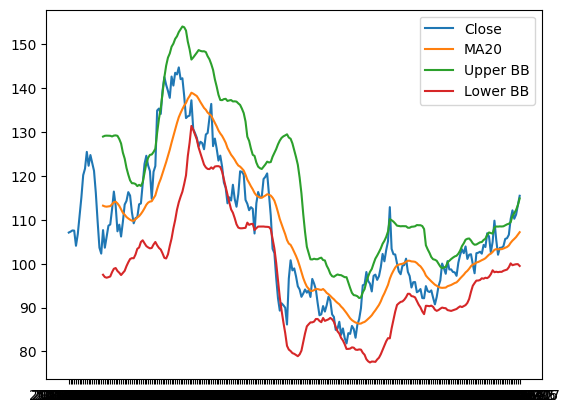

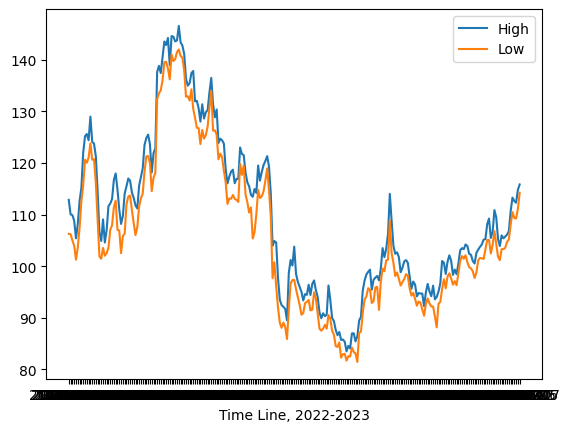

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['MA20'], label='MA20')
plt.plot(df['Date'], df['Upper'], label='Upper BB')
plt.plot(df['Date'], df['Lower'], label='Lower BB')
plt.legend()
plt.show()

high_prices = data['High'].values
low_prices = data['Low'].values

plt.plot(df['Date'], df['High'], label='High')
plt.plot(df['Date'], df['Low'], label='Low')

plt.xlabel('Time Line, 2022-2023')

plt.legend()
plt.show()


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

x = np.column_stack((data['High'], data['Low']))
y = data['Close'].values

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='linear')
])

model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.0005),
              metrics=['mse'])

model.fit(x_train, y_train, epochs=150, batch_size=24)

test_loss, test_mse = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test MSE:', test_mse)


Epoch 1/150
9/9 [==============================] - 1s 6ms/step - loss: 11844.9277 - mse: 11844.9277
Epoch 2/150
9/9 [==============================] - 0s 5ms/step - loss: 11742.3877 - mse: 11742.3877
Epoch 3/150
9/9 [==============================] - 0s 4ms/step - loss: 11502.3799 - mse: 11502.3799
Epoch 4/150
9/9 [==============================] - 0s 5ms/step - loss: 10894.2490 - mse: 10894.2490
Epoch 5/150
9/9 [==============================] - 0s 5ms/step - loss: 9526.9883 - mse: 9526.9883
Epoch 6/150
9/9 [==============================] - 0s 5ms/step - loss: 6923.1450 - mse: 6923.1450
Epoch 7/150
9/9 [==============================] - 0s 5ms/step - loss: 3158.7688 - mse: 3158.7688
Epoch 8/150
9/9 [==============================] - 0s 5ms/step - loss: 679.2021 - mse: 679.2021
Epoch 9/150
9/9 [==============================] - 0s 5ms/step - loss: 861.8550 - mse: 861.8550
Epoch 10/150
9/9 [==============================] - 0s 6ms/step - loss: 499.2788 - mse: 499.2788
Epoch 11/150
9/9 

In [ ]:
new_data = np.array([[316.50, 312.65]])
new_data_scaled = scaler.transform(new_data)

y_pred = model.predict(new_data_scaled)[0][0]

print('Predicted closing price:', y_pred)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

naive_prediction = np.mean(y_train)
naive_predictions = np.full_like(y_test, naive_prediction)
naive_mse = mean_squared_error(y_test, naive_predictions)


print('Naive Model MSE:', naive_mse)
Percentage_accuracy = 100 - (mse / naive_mse) * 100
print('Percentage Accuracy: ', Percentage_accuracy)


1/1 [==============================] - 0s 117ms/step
Predicted closing price: 392.17032
2/2 [==============================] - 0s 8ms/step
Mean Squared Error (MSE): 1.4303766065246553
Naive Model MSE: 218.72166352050684
Percentage Accuracy:  99.34602883706097


In [ ]:
def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

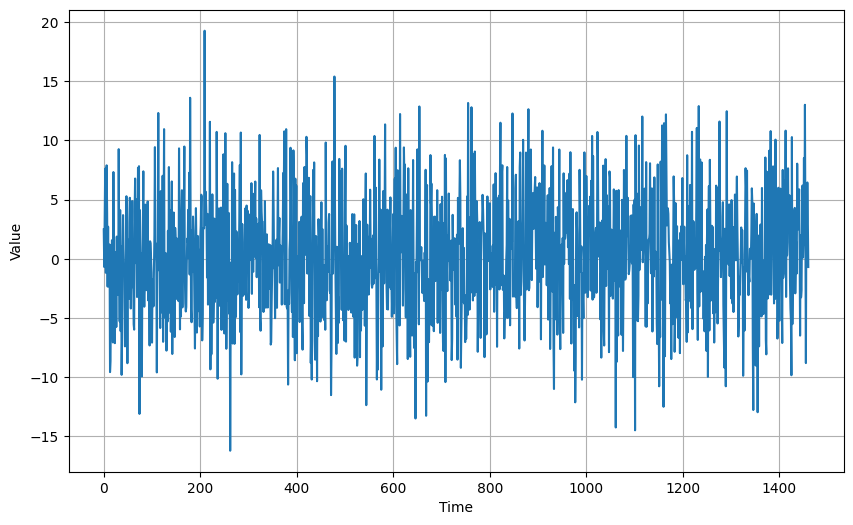

In [ ]:
#Messing around with forecasts
import matplotlib.pyplot as plt

def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

noise_level = 5
time = np.arange(4 * 365 + 1)
noise = white_noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, noise)
plt.show()

2/2 [==============================] - 0s 4ms/step


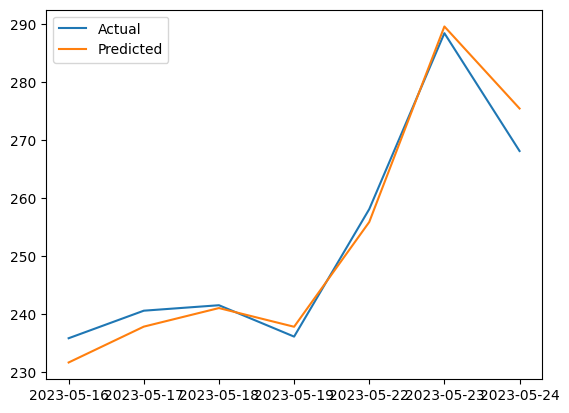

In [ ]:
y_pred = model.predict(x_test)
last_week_idx = len(df) - 7
plt.plot(df.iloc[last_week_idx:]['Date'], y_test[-7:], label='Actual')
plt.plot(df.iloc[last_week_idx:]['Date'], y_pred[-7:], label='Predicted')
plt.legend()
plt.show()


#5/18 - FIX THE DATES